# <font face = 'Impact' color = '#FFAEBC' > Getting Ready with our Second Mini-Project <font/>
#### <font face = 'Times New Roman' color = '#A16AE8'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
In this notebook, we will be importing packages and use them to load and explore data sets. We will be using the pandas package to load datasets and qdesc to explore both categorical and numerical variables. Functions to be used include pd.read_excel, pd.read_csv, head, qd.desc, qd.normcheck_dashboard, qd.freqdist_a, and qd.freqdist_to_excel.

# <font face = 'Impact' color = '#FFAEBC' > Exploring Sleep Hours during Weeknights <font/>

#Business Understanding
##Sleep duration is a key factor influencing employee well-being, productivity, and overall organizational performance. Insufficient or irregular sleep can increase absenteeism, reduce cognitive efficiency, and contribute to workplace errors. This study aims to examine patterns in employees’ sleep duration during weeknights and explore how demographic and employment-related factors, such as age, sex, marital status, and employment type, may influence these patterns. By identifying significant trends or disparities in sleep behavior, organizations can better understand potential risks to employee health and performance and design targeted interventions, such as wellness programs or work schedule adjustments. Ultimately, the analysis supports data-driven decision-making to enhance employee well-being and operational efficiency.

In [ ]:
# Importing the necessary packages for us to use certain functions.
%pip install qdesc
import pandas as pd
import numpy as np
import qdesc as qd

In [ ]:
# Loading a data set (SleepData.xlsx) and storing it into a variable.
df = pd.read_excel('SleepData.xlsx')
df

,Sex,Age,MaritalStatus,Employment,sleep(hrs)/weeknights
0,Male,30,Single,Permanent,8.85
1,Female,58,Married,Permanent,8.76
2,Female,60,Single,Permanent,8.49
3,Male,43,Single,Permanent,8.85
4,Female,43,Single,Permanent,8.73
...,...,...,...,...,...
666,Female,59,Married,Probationary,6.15
667,Female,76,Single,Probationary,4.90
668,Male,72,Married,Probationary,6.41
669,Female,25,Single,Probationary,5.18


In [ ]:
# Check the first 5 rows of the dataframe
df.head(5)

,Sex,Age,MaritalStatus,Employment,sleep(hrs)/weeknights
0,Male,30,Single,Permanent,8.85
1,Female,58,Married,Permanent,8.76
2,Female,60,Single,Permanent,8.49
3,Male,43,Single,Permanent,8.85
4,Female,43,Single,Permanent,8.73


In [ ]:
# Check the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    671 non-null    object 
 1   Age                    671 non-null    int64  
 2   MaritalStatus          671 non-null    object 
 3   Employment             671 non-null    object 
 4   sleep(hrs)/weeknights  671 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 26.3+ KB


In [ ]:
# Using the desc function from the qdesc package to perform descriptive analysis.
qd.desc(df)

,count,mean,std,median,MAD,min,max,AD_stat,5% crit_value
Age,671.0,49.80,19.36,49.00,17.00,18.00,84.00,7.38,0.78
sleep(hrs)/weeknights,671.0,7.63,1.39,8.34,0.98,4.52,9.88,35.70,0.78


Age: mean = 49.80, median = 49. Since mean and median are close, the age distribution is fairly balanced.

Sleep Hours (weeknights): Average is 7.63 hrs, median is 8.34 hrs. The lower mean suggests a few short sleepers pull the average down.

In [ ]:
# Generate descriptive analysis for sleep hours when grouped by sex.
group_by_sex = df.groupby('Sex')
group_by_sex['sleep(hrs)/weeknights'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,350.0,7.672943,1.358217,4.52,6.3475,8.33,8.88,9.88
Male,321.0,7.574860,1.425584,4.66,6.2100,8.36,8.89,9.64


## Sex:

Female: Mean = 7.67, Median = 8.33

Male: Mean = 7.57, Median = 8.36
#### Very similar averages, sex has little to no influence on sleep hour

In [ ]:
# Generate descriptive analysis for sleep hours when grouped by employment.
group_by_employment = df.groupby('Employment')
group_by_employment['sleep(hrs)/weeknights'].describe()

,count,mean,std,min,25%,50%,75%,max
Employment,,,,,,,,
Permanent,352.0,8.868438,0.322398,7.96,8.64,8.86,9.0925,9.88
Probationary,319.0,6.255078,0.604951,4.52,5.86,6.22,6.6400,7.90


## Employment:

Permanent: Mean = 8.87

Probationary: Mean = 6.26
####Permanent workers sleep more on average possibly because of more stable schedules and less job stress compared to probationary workers.

In [ ]:
# Generate descriptive analysis for sleep hours when grouped by marital status.
group_by_marital_status = df.groupby('MaritalStatus')
group_by_marital_status['sleep(hrs)/weeknights'].describe()

,count,mean,std,min,25%,50%,75%,max
MaritalStatus,,,,,,,,
Married,333.0,7.667838,1.396639,4.66,6.2500,8.44,8.93,9.64
Single,338.0,7.584822,1.385605,4.52,6.2725,8.26,8.85,9.88


## Marital Status:
Married: Mean = 7.67
Single: Mean = 7.58

####Sleep averages are very close, marital status does not strongly affect sleep hours.


In [ ]:
# Use the qdesc package to explore the data for assumption of normality for the specified variable.
print(qd.desc(df[["sleep(hrs)/weeknights"]]))

                       count  mean   std  median   MAD   min   max  AD_stat  \
sleep(hrs)/weeknights  671.0  7.63  1.39    8.34  0.98  4.52  9.88     35.7   

                       5% crit_value  
sleep(hrs)/weeknights           0.78  


In [ ]:
# Slicing the data frame to only include the single.
single_df = df[df['MaritalStatus'] == 'Single']
single_df

,Sex,Age,MaritalStatus,Employment,sleep(hrs)/weeknights
0,Male,30,Single,Permanent,8.85
2,Female,60,Single,Permanent,8.49
3,Male,43,Single,Permanent,8.85
4,Female,43,Single,Permanent,8.73
6,Male,45,Single,Permanent,8.36
...,...,...,...,...,...
663,Female,61,Single,Probationary,6.51
664,Male,39,Single,Probationary,5.74
667,Female,76,Single,Probationary,4.90
669,Female,25,Single,Probationary,5.18


In [ ]:
# Confirm that the subset would only include those who are single.
print(single_df['MaritalStatus'].unique())

['Single']


                       count  mean   std  median   MAD   min   max  AD_stat  \
sleep(hrs)/weeknights  338.0  7.58  1.39    8.26  1.01  4.52  9.88    16.56   

                       5% crit_value  
sleep(hrs)/weeknights           0.78  

--- Variable: sleep(hrs)/weeknights ---
  Anderson-Darling Statistic : 16.5637
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


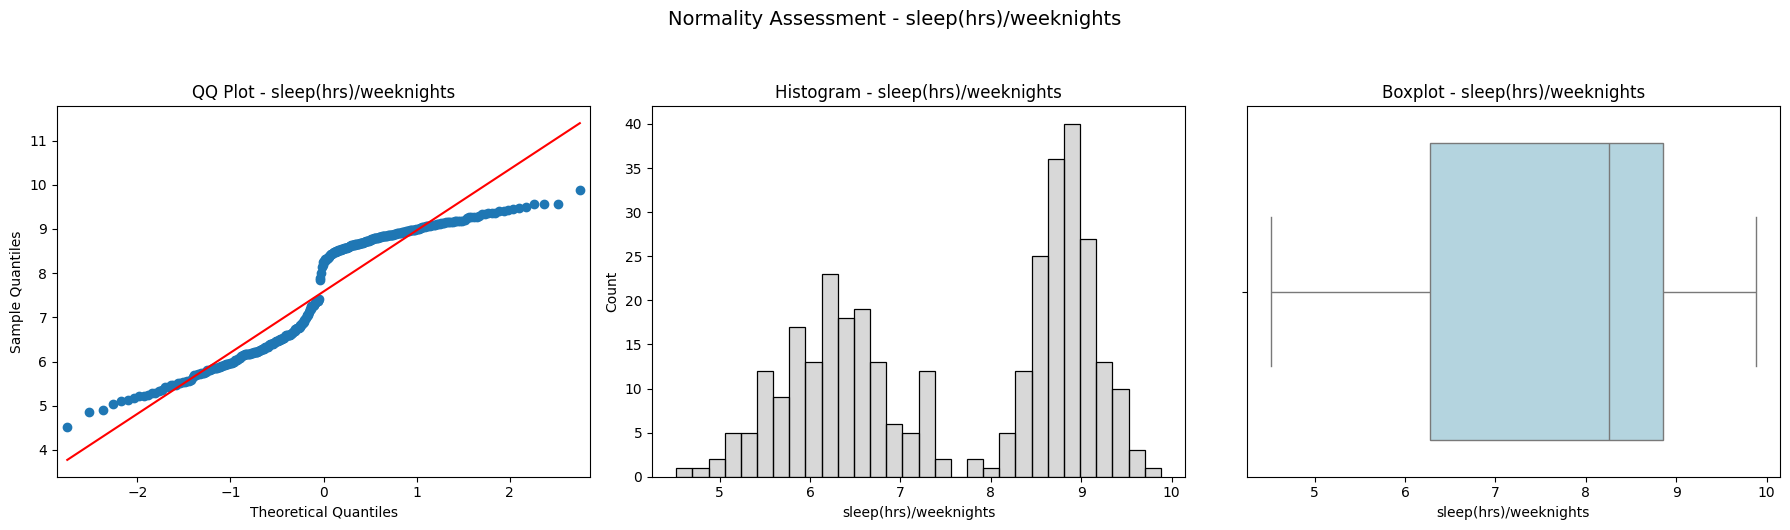

In [ ]:
# Use the qdesc package to explore the data (only those who are Single) for assumption of normality.
print(qd.desc(single_df[["sleep(hrs)/weeknights"]]))
qd.normcheck_dashboard(single_df[["sleep(hrs)/weeknights"]])

In [ ]:
# Slicing the data frame to only include the married.
married_df = df[df['MaritalStatus'] == 'Married']
married_df

,Sex,Age,MaritalStatus,Employment,sleep(hrs)/weeknights
1,Female,58,Married,Permanent,8.76
5,Female,32,Married,Permanent,8.70
10,Female,29,Married,Permanent,9.05
11,Female,31,Married,Permanent,9.41
12,Male,38,Married,Permanent,8.94
...,...,...,...,...,...
661,Female,67,Married,Probationary,7.20
662,Male,20,Married,Probationary,6.38
665,Male,39,Married,Probationary,6.22
666,Female,59,Married,Probationary,6.15


In [ ]:
# Confirm that the subset is all married.
print(married_df['MaritalStatus'].unique())

['Married']


                       count  mean  std  median   MAD   min   max  AD_stat  \
sleep(hrs)/weeknights  333.0  7.67  1.4    8.44  0.88  4.66  9.64    19.32   

                       5% crit_value  
sleep(hrs)/weeknights           0.78  

--- Variable: sleep(hrs)/weeknights ---
  Anderson-Darling Statistic : 19.3198
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


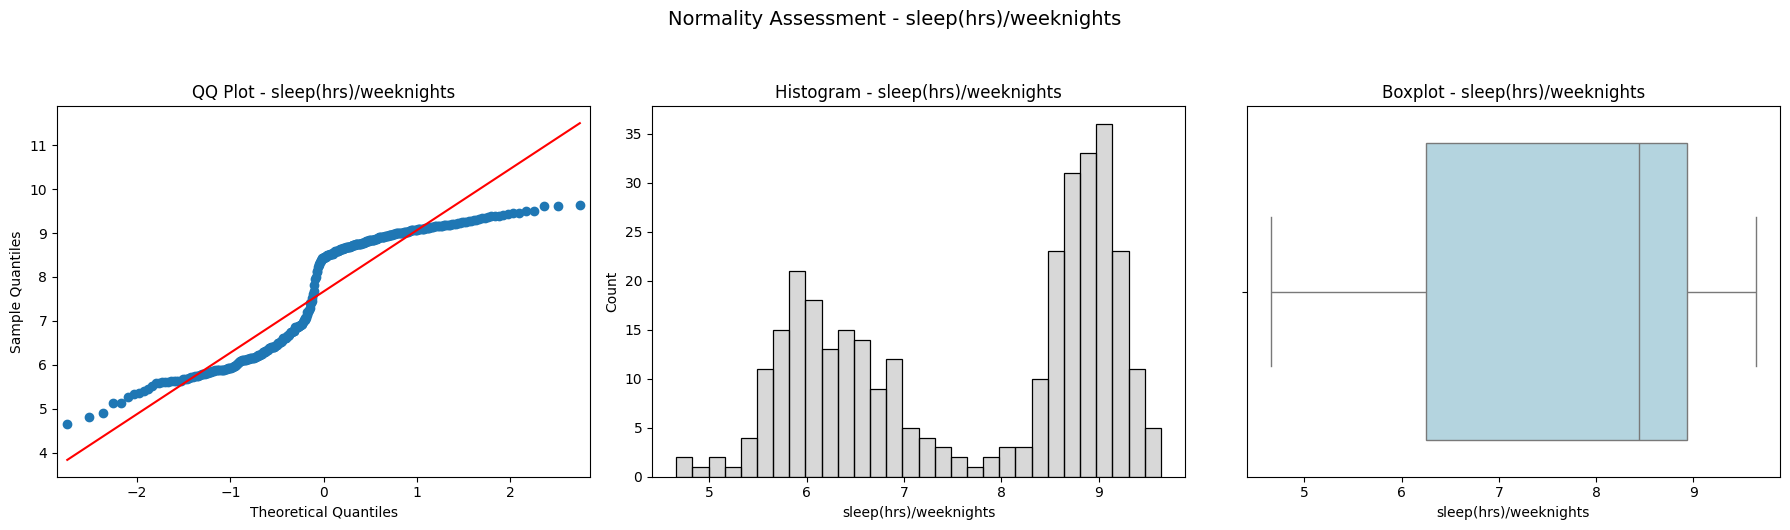

In [ ]:
# Use the qdesc package to explore the data for assumption of normality.
print(qd.desc(married_df[["sleep(hrs)/weeknights"]]))
qd.normcheck_dashboard(married_df[["sleep(hrs)/weeknights"]])

In [ ]:
# Generate a frequency distribution for a specified variable: Sex
print(qd.freqdist(df, column_name='Sex'))

      Sex  Count  Percentage
0  Female    350       52.16
1    Male    321       47.84


#### Sex: Female (52.16%) and Male (47.84%) – fairly balanced sample with slightly more females.

In [ ]:
# Generate a frequency distribution for a specified variable: Employment
print(qd.freqdist(df, column_name='Employment'))

     Employment  Count  Percentage
0     Permanent    352       52.46
1  Probationary    319       47.54


#### Employment: Permanent (52.46%) and Probationary (47.54%) – almost evenly distributed.


In [ ]:
# Generate a frequency distribution for a specified variable: Marital Status
print(qd.freqdist(single_df, column_name='MaritalStatus'))

  MaritalStatus  Count  Percentage
0        Single    338       100.0


In [ ]:
# Generate frequency distribution for all the categorical features from the said data frame.
cat_col = ['Sex', 'Employment', 'MaritalStatus']
for col in cat_col:
    print(qd.freqdist(df, column_name=col))

      Sex  Count  Percentage
0  Female    350       52.16
1    Male    321       47.84
     Employment  Count  Percentage
0     Permanent    352       52.46
1  Probationary    319       47.54
  MaritalStatus  Count  Percentage
0        Single    338       50.37
1       Married    333       49.63


In [ ]:
# Generating a frequency distribution but this time have it stored in an excel file and organized
# on a per sheet basis per categorical feature.
cat_col = ['Sex', 'Employment', 'MaritalStatus']
with pd.ExcelWriter("freqdist.xlsx") as writer:
    for col in cat_col:
        qd.freqdist(df, column_name=col).to_excel(writer, sheet_name=col)
    print("Saved to freqdist.xlsx")

Saved to freqdist.xlsx




*   Frequency distribution gives us a basic profile of the dataset before we perform deeper statistical analysis. It tells us whether we have enough data in each category to make valid comparisons.
*   Mean tells us the “average” sleep duration.

*  Median is more robust to skewness/outliers and may be a better measure here since the data is not normally distributed.
*  Spread (SD) tells us how much individual sleep hours vary.
